
Why are we building the neural networks from scratch? Because when TensorFlow is used, we can't get to know how they work. So when we know how they work, then we can enjoy.

Here we are using a digit classification dataset called MNIST dataset.
In this, there are 28 by 28 low resolution, hand-written digits, 10 to 1000 of these low.

Here we classify the images of what image we are passing that classifies images of hand-written digits.



# Neural Network for Image Classification

## Understanding the Input Data
- We are using **28 x 28 pixel images**, which equals **784 pixels** per image.
- Each pixel value ranges from **0 to 255**, where **255 represents white** and **0 represents black**.
- We have **m training images**, each represented as a matrix.

## Representation of Data
- Each **row** represents an example.
- We have a **matrix** where each row contains **784 columns**, with each column corresponding to a pixel in the image.
- We **transpose** the matrix so that **each column** represents an example.
- After transposing:
  - Each **column** contains **784 rows**.
  - The matrix has **784 rows and m columns**.

## Neural Network Architecture
- We build a **two-layer neural network**:
  1. **Input Layer**:
     - Contains **784 nodes** (one for each pixel).
  2. **Hidden Layer**:
     - Contains **10 nodes**.
  3. **Output Layer**:
     - Contains **10 nodes**, representing the possible digits (0-9).


# Key Points

- **ReLU Activation**: Applied to the **hidden layer**, allowing for **non-linear transformations**.
- **Softmax Activation**: Used for the **output layer** to convert raw class scores into **probabilities**.
- **One-Hot Encoding**: Converts **categorical labels** into a **binary matrix format**, making it suitable for multi-class classification problems.
- **Learning Rate (α)**: Controls how much to update the weights with respect to the **gradient**.


In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt



In [8]:
data = pd.read_csv('nnfs_data/train.csv')


In [9]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [15]:
#X_train[:,0].shape
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [16]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 0 0 ... 0 7 0] [2 6 5 ... 6 1 1]
0.10143902439024391
Iteration:  10
[3 6 6 ... 6 7 6] [2 6 5 ... 6 1 1]
0.17429268292682926
Iteration:  20
[5 0 0 ... 0 7 7] [2 6 5 ... 6 1 1]
0.2390731707317073
Iteration:  30
[3 6 0 ... 0 1 7] [2 6 5 ... 6 1 1]
0.32807317073170733
Iteration:  40
[3 6 0 ... 6 1 7] [2 6 5 ... 6 1 1]
0.3866341463414634
Iteration:  50
[3 6 0 ... 6 1 7] [2 6 5 ... 6 1 1]
0.43765853658536585
Iteration:  60
[3 6 0 ... 6 1 7] [2 6 5 ... 6 1 1]
0.48260975609756096
Iteration:  70
[3 6 0 ... 6 1 7] [2 6 5 ... 6 1 1]
0.5205121951219512
Iteration:  80
[2 6 0 ... 6 1 1] [2 6 5 ... 6 1 1]
0.5508780487804879
Iteration:  90
[2 6 0 ... 6 1 1] [2 6 5 ... 6 1 1]
0.5762195121951219
Iteration:  100
[2 6 0 ... 6 1 1] [2 6 5 ... 6 1 1]
0.5996829268292683
Iteration:  110
[2 6 0 ... 6 1 1] [2 6 5 ... 6 1 1]
0.6213414634146341
Iteration:  120
[2 6 0 ... 6 1 1] [2 6 5 ... 6 1 1]
0.639390243902439
Iteration:  130
[2 6 5 ... 6 1 1] [2 6 5 ... 6 1 1]
0.6567317073170732
Iteration:  1

In [19]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


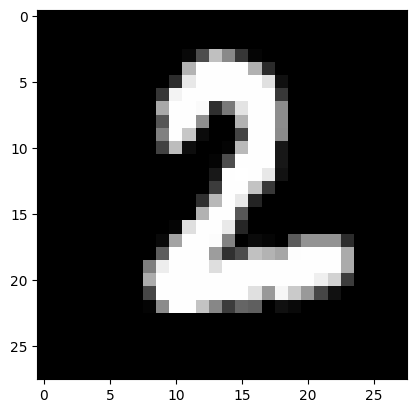

Prediction:  [6]
Label:  6


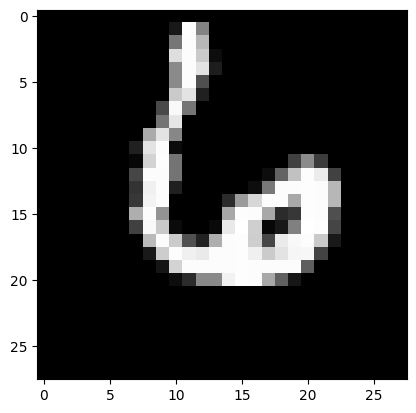

Prediction:  [5]
Label:  5


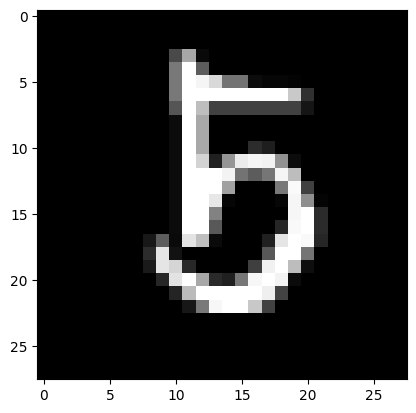

Prediction:  [9]
Label:  9


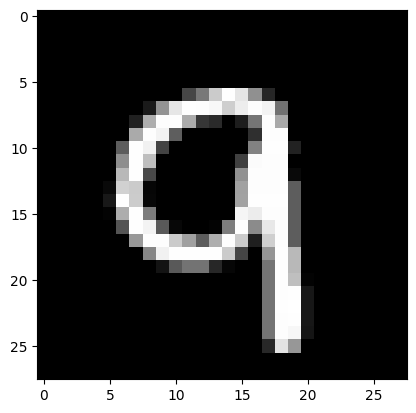

In [24]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)

In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 7 9 7 6 7 1 0 9 8 9 7 4 7 7 1 7 4 1 0 8 8 2 9 0 0 3 9 9 2 9 8 0 7 8 3 1
 0 3 1 3 0 6 1 4 7 4 9 6 4 3 3 6 4 9 4 8 8 2 7 2 9 4 6 2 9 2 8 4 4 5 0 0 4
 8 4 0 9 9 1 0 1 5 0 5 8 9 1 5 0 8 3 1 9 5 2 1 7 1 4 2 4 6 9 8 1 9 4 3 8 7
 4 9 1 8 2 9 8 8 8 0 1 1 7 3 0 1 0 2 6 1 6 2 6 3 0 5 5 1 8 4 1 2 9 1 9 5 8
 3 3 2 3 3 3 3 1 9 0 6 1 1 4 1 0 8 0 0 8 3 1 9 4 3 3 0 0 9 3 0 9 5 4 8 6 1
 1 2 1 3 2 1 4 1 7 1 0 4 3 3 7 3 6 9 4 6 8 4 9 1 5 0 8 4 9 9 4 7 7 5 5 0 2
 6 4 7 4 4 6 3 2 1 1 0 9 9 3 2 9 6 7 0 8 1 8 6 6 9 6 2 6 1 8 1 9 5 2 4 7 8
 3 1 7 5 5 7 3 4 6 1 1 2 4 7 7 2 3 3 0 2 9 3 5 2 0 5 3 4 3 2 1 1 5 8 3 9 5
 6 5 4 7 7 8 5 8 1 1 6 4 7 6 7 9 2 6 9 0 9 9 6 8 1 3 9 9 7 8 7 1 2 6 8 2 9
 5 8 9 0 2 3 6 1 6 3 7 6 7 7 2 9 4 7 8 4 2 4 6 0 8 1 9 3 0 1 3 0 6 0 3 5 7
 8 4 9 1 7 8 0 7 9 9 3 4 3 4 2 9 8 0 0 3 7 4 8 3 6 0 6 8 2 2 1 7 4 4 9 6 1
 7 2 0 6 9 7 1 8 2 5 7 8 0 7 1 8 9 6 0 7 6 7 6 0 5 7 6 9 1 8 0 4 1 8 7 9 9
 0 0 8 5 0 6 3 4 1 3 8 1 5 7 0 1 7 7 0 1 5 6 2 7 1 7 8 7 4 3 9 1 6 1 1 1 2
 3 2 2 7 8 8 1 3 7 8 5 1 

0.83